<a href="https://colab.research.google.com/github/eakubrakova/MFTI_2023/blob/main/lecture_02_code_labs_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Цель занятия
Процесс разработки проекта машинного обучения обычно состоит из следующих шагов:
- **Этап 1: определение задачи**
- **Этап 2: подготовка данных**
- **Этап 3: разработка модели МО**
- **Этап 4: запуск модели**

На этом занятии мы рассмотрим подробно этап 2, подготовку данных, и ответим на вопрос, как подготовить данные для их использования в проекте машинного обучения.

Подготовка данных включает в себя следующие шаги:
- **Сбор данных**: следующий шаг - это сбор данных, необходимых для обучения модели. Можно собрать данные самостоятельно или использовать уже существующие наборы данных.
- **Исследование данных (англ. Exploratory Data Analysis, EDA)**: это процесс исследования и анализа данных, используемый для получения полезной информации и выявления особенностей данных перед применением модели машинного обучения. EDA включает в себя методы визуализации и статистические техники, которые помогают понять данные и выделить важные характеристики.
- **Очистка и исправление данных**: очистка данных от пропусков, дубликатов и ошибок.
- **Разделение выборки**: разделение выборки на тренировочную и тестовую является важным шагом в машинном обучении, который помогает оценить качество модели на новых данных. Тренировочная выборка используется для обучения модели, тестовая выборка - для проверки ее качества.
- **Предобработка признаков**: преобразование признаков, нормализация признаков и т.д.
- **Отбор и создание новых признаков**: отбор и создание новых признаков являются важными этапами предобработки данных в машинном обучении. Хорошо подобранные и созданные признаки могут значительно повысить точность модели. Отбор признаков может быть выполнен двумя способами: автоматически и вручную. Автоматический отбор признаков включает использование алгоритмов, которые оценивают важность каждого признака и выбирают только наиболее значимые. Вручную выбранные признаки обычно определяются на основе экспертного знания в предметной области.

Мы будем пользоваться готовыми наборами данных, соответственно, шаг сбора данных не будет рассмотрен.

# Используемые библиотеки

**Scikit-learn (также известная как sklearn)** - это библиотека машинного обучения на языке Python, которая предоставляет широкий спектр инструментов для решения задач классификации, регрессии, кластеризации, снижения размерности, выбора моделей и многих других. Библиотека основана на библиотеках NumPy, SciPy и matplotlib и имеет простой и интуитивно понятный интерфейс, что делает ее доступной для использования как для начинающих, так и для продвинутых пользователей.

**Pandas** - это библиотека для языка Python, которая предоставляет инструменты для работы с данными и их анализа.

Основными структурами данных, которые предоставляет библиотека Pandas, являются:

- **Series** - это одномерный массив данных, который можно индексировать. Он может содержать данные любого типа, включая числа, строки, объекты Python и т.д.

- **DataFrame** - это двумерный массив данных, представляющий собой таблицу, которую можно рассматривать как набор Series, соединенных друг с другом.

Библиотека Pandas предоставляет множество инструментов для работы с данными, включая:

- Чтение и запись данных в различных форматах (например, CSV, Excel, SQL).

- Извлечение, выборка и фильтрация данных из DataFrame.

- Объединение и преобразование данных в DataFrame.

- Группировка и агрегирование данных.

- Визуализация данных.

In [ ]:
#!pip install ydata_profiling
#Импорт библиотек и необходимых функций
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# from ydata_profiling import ProfileReport

In [ ]:
pd.options.mode.chained_assignment = None  # отключаем предупреждения о присваивании копии DataFrame
pd.options.display.max_columns = None  # отображаем все столбцы
pd.options.display.max_rows = None  # отображаем все строки
pd.options.display.float_format = '{:.2f}'.format  # форматируем вывод чисел с плавающей точкой

In [ ]:
# Загрузка данных
df = pd.read_csv('/content/lecture_02_code_labs_01_pandas.csv', delimiter=",")

In [ ]:
# Проверка типа данных
type(df)

pandas.core.frame.DataFrame

# Исследование данных

In [ ]:
# Просмотр первых 5 строк таблицы
df.head(5)

,Год,Статус,Продолжительность жизни,Смертность среди взрослых,Смертность младенцев,Алкоголь,Процентное использование расходов,Гепатит B,Корь,ИМТ,Смертность детей до 5 лет,Полио,Общие расходы,Дифтерия,ВИЧ/СПИД,ВВП,Население,Худоба 1-19 лет,Худоба 5-9 лет,Индекс состава доходов,Образование
0,2015,Развивающаяся,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10
1,2014,Развивающаяся,59.90,271.00,64,0.01,73.52,62.00,492,18.60,86,58.00,8.18,62.00,0.10,612.70,327582.00,17.50,17.50,0.48,10.00
2,2013,Развивающаяся,59.90,268.00,66,0.01,73.22,64.00,430,18.10,89,62.00,8.13,64.00,0.10,631.74,31731688.00,17.70,17.70,0.47,9.90
3,2012,Развивающаяся,59.50,272.00,69,0.01,78.18,67.00,2787,17.60,93,67.00,8.52,67.00,0.10,669.96,3696958.00,17.90,18.00,0.46,9.80
4,2011,Развивающаяся,59.20,275.00,71,0.01,7.10,68.00,3013,17.20,97,68.00,7.87,68.00,0.10,63.54,2978599.00,18.20,18.20,0.45,9.50


In [ ]:
# Просмотр крайних строк таблицы
df.tail(5)

,Год,Статус,Продолжительность жизни,Смертность среди взрослых,Смертность младенцев,Алкоголь,Процентное использование расходов,Гепатит B,Корь,ИМТ,Смертность детей до 5 лет,Полио,Общие расходы,Дифтерия,ВИЧ/СПИД,ВВП,Население,Худоба 1-19 лет,Худоба 5-9 лет,Индекс состава доходов,Образование
2949,2004,Развивающаяся,44.30,723.00,27,4.36,0.00,68.00,31,27.10,42,67.00,7.13,65.00,33.60,454.37,12777511.00,9.40,9.40,0.41,9.20
2950,2003,Развивающаяся,44.50,715.00,26,4.06,0.00,7.00,998,26.70,41,7.00,6.52,68.00,36.70,453.35,12633897.00,9.80,9.90,0.42,9.50
2951,2002,Развивающаяся,44.80,73.00,25,4.43,0.00,73.00,304,26.30,40,73.00,6.53,71.00,39.80,57.35,125525.00,1.20,1.30,0.43,10.00
2952,2001,Развивающаяся,45.30,686.00,25,1.72,0.00,76.00,529,25.90,39,76.00,6.16,75.00,42.10,548.59,12366165.00,1.60,1.70,0.43,9.80
2953,2000,Развивающаяся,46.00,665.00,24,1.68,0.00,79.00,1483,25.50,39,78.00,7.10,78.00,43.50,547.36,12222251.00,11.00,11.20,0.43,9.80


In [ ]:
# Информация о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Год                                2954 non-null   int64  
 1   Статус                             2954 non-null   object 
 2   Продолжительность жизни            2944 non-null   float64
 3   Смертность среди взрослых          2944 non-null   float64
 4   Смертность младенцев               2954 non-null   int64  
 5   Алкоголь                           2759 non-null   float64
 6   Процентное использование расходов  2954 non-null   float64
 7   Гепатит B                          2401 non-null   float64
 8   Корь                               2954 non-null   int64  
 9   ИМТ                                2920 non-null   float64
 10  Смертность детей до 5 лет          2954 non-null   int64  
 11  Полио                              2935 non-null   float

In [ ]:
# Первичное исследование данных можно провести с помощью стандартных средств pandas
df.describe()

,Год,Продолжительность жизни,Смертность среди взрослых,Смертность младенцев,Алкоголь,Процентное использование расходов,Гепатит B,Корь,ИМТ,Смертность детей до 5 лет,Полио,Общие расходы,Дифтерия,ВИЧ/СПИД,ВВП,Население,Худоба 1-19 лет,Худоба 5-9 лет,Индекс состава доходов,Образование
count,2954.00,2944.00,2944.00,2954.00,2759.00,2954.00,2401.00,2954.00,2920.00,2954.00,2935.00,2727.00,2935.00,2954.00,2506.00,2302.00,2920.00,2920.00,2787.00,2791.00
mean,2007.52,69.12,166.41,30.28,4.60,734.36,80.87,2411.49,38.25,42.03,82.51,5.94,82.29,1.86,7438.00,12720485.24,4.85,4.88,0.63,11.98
std,4.61,9.61,127.05,117.61,4.04,1983.22,25.09,11437.95,20.02,160.01,23.42,2.49,23.71,5.39,14235.69,60803209.17,4.42,4.50,0.21,3.35
min,2000.00,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,34.00,0.10,0.10,0.00,0.00
25%,2004.00,63.00,74.00,0.00,0.89,4.44,77.00,0.00,19.30,0.00,78.00,4.27,78.00,0.10,458.99,196567.25,1.60,1.50,0.49,10.10
50%,2008.00,72.00,144.00,3.00,3.77,63.86,92.00,17.00,43.15,4.00,93.00,5.76,93.00,0.10,1746.37,1396804.50,3.40,3.40,0.68,12.30
75%,2012.00,75.60,229.00,23.00,7.68,437.08,97.00,362.00,56.10,29.00,97.00,7.47,97.00,0.80,5873.39,7470403.50,7.20,7.20,0.78,14.20
max,2015.00,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1293859294.00,27.70,28.60,0.95,20.70


In [ ]:
# для EDA также можно использовать сторонние библиотеки, такие как ydata-profiling
# profile = ProfileReport(df, title="Profiling Report")
# profile.to_notebook_iframe()
# profile.to_file("lecture_02_code_labs_01_pandas.html") # сохраниние отчета в файл

# Очистка и исправление данных
Очистка данных - это процесс предварительной обработки данных, направленный на удаление или исправление ошибочных, неактуальных, неполных, поврежденных, дублированных или неправильно форматированных данных, чтобы улучшить качество и точность модели машинного обучения.
Ниже перечислены некоторые методы очистки данных в машинном обучении:
- **Удаление дубликатов**
Дубликаты могут привести к неверным результатам, поэтому необходимо удалить все дубликаты в данных.
- **Исправление ошибок:** В данных могут быть ошибки, например, опечатки или неверные значения. Такие ошибки могут быть исправлены с помощью автоматических методов, таких как исправление опечаток.
Эти методы могут быть применены как отдельно, так и в сочетании друг с другом. Очистка данных является важным шагом в процессе подготовки данных для модели машинного обучения и может существенно улучшить качество модели.

В данном датасете нет текстовых данных, поэтому исправление ошибок применяться не будет.

In [ ]:
#Удаление дубликатов,
print(df.shape)
# используется метод drop_duplicates() с параметром inplace=True для удаления дубликатов в исходном DataFrame.
df.drop_duplicates(inplace=True)
print(df.shape) # удалено 16 дубликатов

(2954, 21)
(2938, 21)


# Разделение выборки на тренировочную и тестовую
Scikit-learn содержит множество алгоритмов, включая методы разбиения данных. Scikit-learn (sklearn) предоставляет несколько методов разбиения выборки на тренировочную и тестовую части:

**train_test_split** - случайное разбиение выборки на тренировочную и тестовую части. Этот метод наиболее часто используется для оценки качества модели.

**KFold** - K-fold кросс-валидация, метод позволяющий оценить качество модели на нескольких подмножествах данных. Выборка разбивается на K частей, каждая из которых используется в качестве тестовой выборки для одного из K экспериментов, а остальные K-1 частей используются для обучения модели.

**StratifiedKFold** - вариант K-fold кросс-валидации с сохранением соотношения классов в каждой из частей. Это особенно важно, когда имеются несбалансированные классы.

**LeaveOneOut** - метод, при котором каждый объект выборки последовательно используется в качестве тестового, а остальные - для обучения.

**ShuffleSplit** - случайный перетасованный разброс, выборка разбивается на n_iter наборов из train_size тренировочных и test_size тестовых объектов. Каждый разброс независим от других.

**StratifiedShuffleSplit** - вариант ShuffleSplit, сохраняющий соотношение классов в каждом из наборов.

**TimeSeriesSplit** - разбиение временных рядов на тренировочную и тестовую выборки, учитывающее хронологический порядок данных.

Для использования любого из этих методов в библиотеке sklearn необходимо импортировать соответствующий класс. Например, для использования метода train_test_split необходимо выполнить следующий код:

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
```
где X и y - данные и целевая переменная, test_size - доля выборки, которую необходимо выделить в качестве тестовой, а random_state - начальное значение для генератора псевдослучайных чисел.

В данном практическом занятии мы воспользуемся методом `train_test_split`, в занятии с KNN мы рассмотрим метод кросс-валидации.

In [ ]:
# разделяем данные на обучающую и тестовую выборки
train, test = train_test_split(
    df,
    test_size=0.2,  # доля тестовой выборки
    random_state=1  # для воспроизводимости результата
)

# выводим размерности полученных выборок
print('Размерность тренировочной выборки:', train.shape)
print('Размерность тестовой выборки:', test.shape)

Размерность тренировочной выборки: (2350, 21)
Размерность тестовой выборки: (588, 21)


# Виды признаков
В машинном обучении существуют различные виды признаков, которые могут использоваться для описания объектов или данных. Некоторые из них включают:
- **Категориальные признаки**: признаки, которые принимают значения из определенного набора категорий или классов. Примерами категориальных признаков могут служить цвет, тип материала и т.д.
- **Числовые признаки**: признаки, которые принимают числовые значения, такие как длина, ширина, высота, возраст и т.д.
- **Бинарные признаки**: признаки, которые могут принимать только два значения, например, 0 и 1, да или нет, и т.д.
- **Текстовые признаки**: признаки, которые описывают текстовые данные, такие как заголовки новостей, описания продуктов и т.д.
- **Географические признаки**: признаки, которые описывают географические данные, такие как координаты, адреса и т.д.
- **Временные признаки**: признаки, которые описывают данные, относящиеся ко времени — дата, время, длительность и т.д.

Работа с разными видами признаков в машинном обучении может иметь свои особенности, так как каждый вид признаков имеет свои уникальные свойства и может требовать специфических методов работы.


# Предобработка признаков

## Обработка выбросов
В данной выборке мы не будем удалять выбросы, так как даннные собраны из разных стран, и разброс в значениях может быть обусловлен реальными факторами.
Приведем здесь основные примеры определения и удаления выбросов:
- Метод межквартильного размаха (interquartile range - IQR): Этот метод основан на вычислении межквартильного размаха данных, который определяет расстояние между 25-м и 75-м процентилем данных. Затем выбросы определяются как значения, находящиеся за пределами верхнего и нижнего порогов, определяемых как Q1 - 1.5 * IQR и Q3 + 1.5 * IQR соответственно.
```python
df = pd.DataFrame({
    'col1': [1, 2, 3, 4, 5, 100],
    'col2': [10, 20, 30, 40, 50, 1000] # создаем DataFrame
})
Q1 = df['col1'].quantile(0.25) # определяем квартили для столбца 'col1'
Q3 = df['col1'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['col1'] >= Q1 - 1.5*IQR) & (df['col1'] <= Q3 + 1.5*IQR)] # удаляем выбросы в столбце 'col1'
```

- Удаление выбросов на основе статистических критериев: Этот метод использует статистические критерии, такие как Z-оценка или T-тест, для определения, является ли значение выбросом или нет. Если значение превышает определенный пороговый уровень, оно считается выбросом и удаляется.
```python
import scipy
df = pd.DataFrame({
    'col1': [1, 2, 3, 4, 5, 100],
    'col2': [10, 20, 30, 40, 50, 1000] # создаем DataFrame
})
df = df[(np.abs(scipy.stats.zscore(df['col1'])) < 3)] # удаляем выбросы в столбце 'col1' на основе Z-оценки
```

## Заполнение пропущенных значений
Некоторые значения могут быть пропущены или недоступны, например, из-за ошибок или недоступности источника данных. Пропущенные значения можно заменить средним, медианным или модальным значением, или использовать другие методы заполнения, например, на основе предсказаний модели.

In [ ]:
# общее количество отсутствующих элементов по столбцам
train.isnull().sum()

Год                                  0
Продолжительность жизни              0
Смертность среди взрослых            0
Смертность младенцев                 0
Алкоголь                             0
Процентное использование расходов    0
Гепатит B                            0
Корь                                 0
ИМТ                                  0
Смертность детей до 5 лет            0
Полио                                0
Общие расходы                        0
Дифтерия                             0
ВИЧ/СПИД                             0
ВВП                                  0
Население                            0
Худоба 1-19 лет                      0
Худоба 5-9 лет                       0
Индекс состава доходов               0
Образование                          0
Статус_Развивающаяся                 0
Статус_Развитая                      0
dtype: int64

In [ ]:
# df.dropna(how = 'any', inplace = True)
# удаляем строки, в которых есть не менее 5 пропущенных значения
# train.dropna(thresh=5, inplace=True)
# test.dropna(thresh=5, inplace=True)

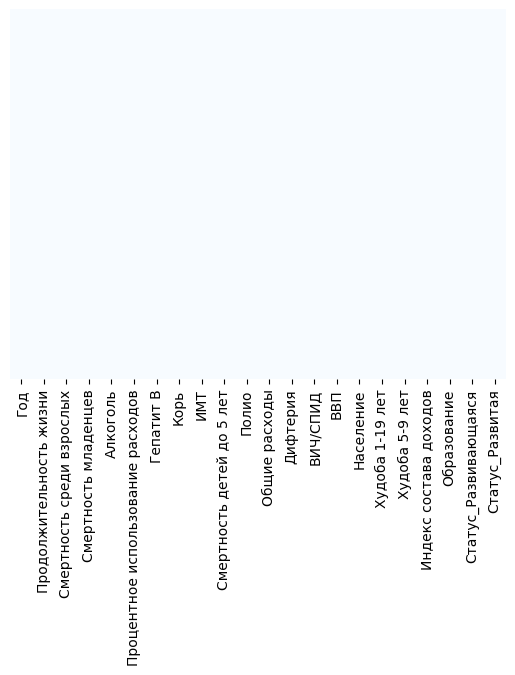

In [ ]:
# визуализация пропущенных значений
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

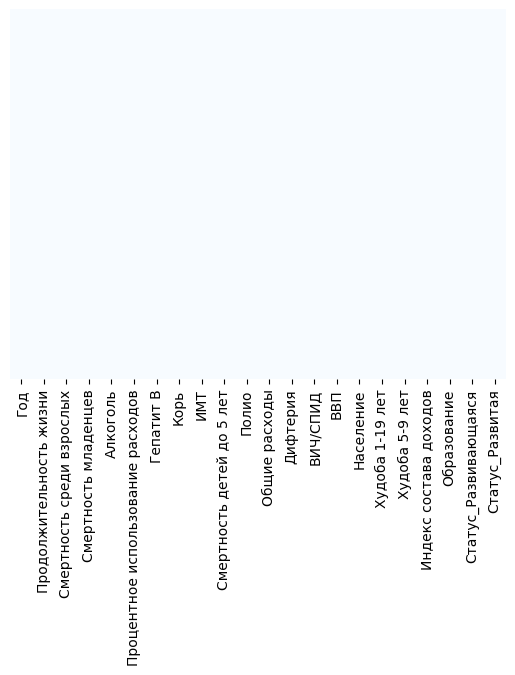

In [ ]:
# визуализация пропущенных значений
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

In [ ]:
# заполняем пропущенные значения средним значением по столбцу
mean_values = train.mean(numeric_only=True)
train.fillna(value=mean_values, inplace=True);
test.fillna(value=mean_values, inplace=True);

In [ ]:
train.isnull().sum()

Год                                  0
Статус                               0
Продолжительность жизни              0
Смертность среди взрослых            0
Смертность младенцев                 0
Алкоголь                             0
Процентное использование расходов    0
Гепатит B                            0
Корь                                 0
ИМТ                                  0
Смертность детей до 5 лет            0
Полио                                0
Общие расходы                        0
Дифтерия                             0
ВИЧ/СПИД                             0
ВВП                                  0
Население                            0
Худоба 1-19 лет                      0
Худоба 5-9 лет                       0
Индекс состава доходов               0
Образование                          0
dtype: int64

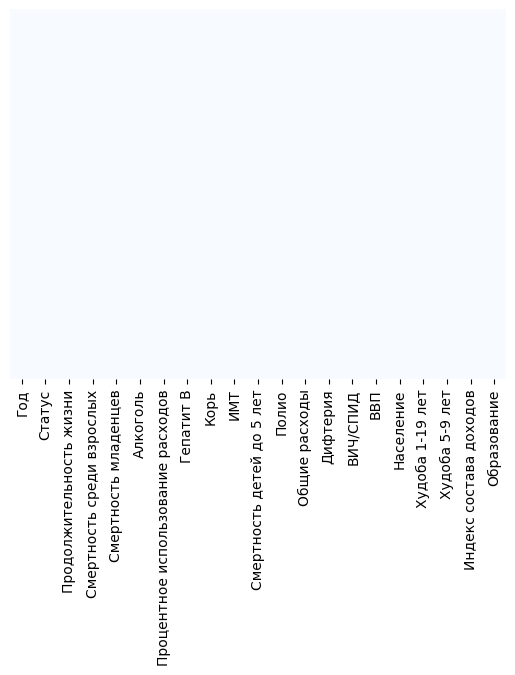

In [ ]:
# визуализация пропущенных значений
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

## Преобразование данных в числовой формат
Если вы имеете дело с данными в Pandas DataFrame, которые находятся в текстовом или строковом формате, вы можете использовать функции преобразования типов данных для преобразования их в числовой формат.

- astype(): Метод astype() может быть использован для преобразования столбца в числовой формат. Пример использования:
```python
df = pd.DataFrame({'A': ['1', '2', '3'], 'B': ['4', '5', '6']}) # Создаем DataFrame
df['A'] = df['A'].astype(int) # Преобразование столбца 'A' в числовой формат
```
- to_numeric(): Функция to_numeric() может быть использована для преобразования столбца или Series в числовой формат. Эта функция также может обрабатывать значения, которые не могут быть преобразованы в числовой формат, и заменять их на NaN. Пример использования:
```python
df = pd.DataFrame({'A': ['1', '2', '3'], 'B': ['4', '5', '6']}) # Создаем DataFrame
df['A'] = pd.to_numeric(df['A'], errors='coerce') # Преобразование столбца 'A' в числовой формат
```

## Нормализация и масштабирование признаков

Нормализация данных - это важный процесс подготовки данных для многих алгоритмов машинного обучения. Ее целью является приведение значений признаков к одному и тому же диапазону, что может улучшить производительность моделей и снизить возможные проблемы с выбросами.

Вот несколько причин, по которым может понадобиться применять нормализацию данных:

- Разные шкалы измерения: Если в ваших данных есть признаки с разными единицами измерения (например, возраст в годах и доход в долларах), то нормализация может быть полезной для приведения их к одному и тому же масштабу.

- Алгоритмы, зависящие от расстояний: Многие алгоритмы машинного обучения (например, метод k-средних или метод ближайших соседей) используют расстояния между объектами для принятия решений. Если признаки не нормализованы, то признаки с большими значениями могут оказать большое влияние на расстояние и перекосить результаты.

- Статистические методы: Нормализация может быть полезной для статистических методов, таких как линейная регрессия или анализ главных компонент, которые используют стандартные отклонения для вычисления весов признаков.

- Стабильность обучения: Нормализация может помочь уменьшить влияние выбросов в данных, что может улучшить стабильность и производительность модели.

В целом, если вы работаете с данными, которые содержат признаки с разными единицами измерения или используете алгоритмы, которые зависят от расстояний между объектами, то нормализация может быть полезной для улучшения производительности вашей модели.

Нормализация обычно используется, когда данные имеют распределение, которое сильно отклоняется от нормального распределения. Например, когда данные имеют сильные выбросы или содержат несколько групп, каждая из которых имеет свой диапазон значений. Нормализация помогает сжать диапазон значений признаков в заданный диапазон (например, [0,1]) и обеспечить более равномерное распределение значений.

Стандартизация обычно используется, когда данные имеют распределение, близкое к нормальному, и когда важно сохранить среднее значение и стандартное отклонение признаков. Стандартизация позволяет преобразовать данные таким образом, чтобы они имели среднее значение 0 и стандартное отклонение 1. Это может быть полезно для алгоритмов, которые используют стандартные отклонения или коэффициенты корреляции признаков.


**Нормализация (MinMax нормализация):** Этот метод преобразует значения признаков в диапазон от 0 до 1 или от -1 до 1. Это можно сделать с помощью формулы: X_norm = (X - X_min) / (X_max - X_min), где X - значение признака, X_min и X_max - минимальное и максимальное значения признака соответственно. В библиотеке pandas для этого можно использовать класс MinMaxScaler из модуля sklearn.preprocessing.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
train['ИМТ'] = scaler.fit_transform(train['ИМТ'].values.reshape(-1,1))
train['ИМТ'].describe()

count   2350.00
mean       0.44
std        0.23
min        0.00
25%        0.22
50%        0.49
75%        0.64
max        1.00
Name: ИМТ, dtype: float64

In [ ]:
test['ИМТ'] = scaler.transform(test['ИМТ'].values.reshape(-1,1))
test['ИМТ'].describe()

count   588.00
mean      0.42
std       0.24
min       0.00
25%       0.20
50%       0.47
75%       0.63
max       0.95
Name: ИМТ, dtype: float64

Для стандартизации данных в pandas можно использовать метод scikit-learn StandardScaler. Для этого нужно импортировать класс StandardScaler из модуля sklearn.preprocessing и создать экземпляр этого класса. Затем можно использовать метод fit_transform для обработки данных.

In [ ]:
scaler = StandardScaler()
train['Общие расходы'] = scaler.fit_transform(train['Общие расходы'].values.reshape(-1,1))
round(train['Общие расходы']).describe()

count   2350.00
mean      -0.02
std        1.04
min       -2.00
25%       -1.00
50%        0.00
75%        1.00
max        5.00
Name: Общие расходы, dtype: float64

In [ ]:
test['Общие расходы'] = scaler.transform(test['Общие расходы'].values.reshape(-1,1))
round(test['Общие расходы']).describe()

count   588.00
mean      0.01
std       1.06
min      -2.00
25%      -1.00
50%       0.00
75%       1.00
max       5.00
Name: Общие расходы, dtype: float64

## Преобразование категориальных признаков

One-hot encoding - это процесс преобразования категориальных данных в числовые признаки. При выполнении one-hot encoding необходимо учитывать, что разделение выборки на train и test может привести к проблемам, если в train и test наборах данных содержатся различные уникальные значения категориального признака. Для того, чтобы решить эту проблему, необходимо выполнить one-hot encoding на train и test наборах данных, используя одинаковые наборы столбцов-индикаторов.

In [ ]:
# выполняем one-hot encoding на train и test наборах данных
# используем параметр columns для указания списка столбцов, которые нужно преобразовать
train = pd.get_dummies(train, columns=['Статус'])
test = pd.get_dummies(test, columns=['Статус'])

# выравниваем наборы столбцов-индикаторов в train и test DataFrame,
# чтобы обеспечить одинаковый набор столбцов в обоих наборах данных
train, test = train.align(test, join='outer', axis=1, fill_value=0)

# печатаем результат
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 1016 to 1061
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Год                                2350 non-null   int64  
 1   Продолжительность жизни            2350 non-null   float64
 2   Смертность среди взрослых          2350 non-null   float64
 3   Смертность младенцев               2350 non-null   int64  
 4   Алкоголь                           2350 non-null   float64
 5   Процентное использование расходов  2350 non-null   float64
 6   Гепатит B                          2350 non-null   float64
 7   Корь                               2350 non-null   int64  
 8   ИМТ                                2350 non-null   float64
 9   Смертность детей до 5 лет          2350 non-null   int64  
 10  Полио                              2350 non-null   float64
 11  Общие расходы                      2350 non-null   fl

In [ ]:
train.head()

,Год,Продолжительность жизни,Смертность среди взрослых,Смертность младенцев,Алкоголь,Процентное использование расходов,Гепатит B,Корь,ИМТ,Смертность детей до 5 лет,Полио,Общие расходы,Дифтерия,ВИЧ/СПИД,ВВП,Население,Худоба 1-19 лет,Худоба 5-9 лет,Индекс состава доходов,Образование,Статус_Развивающаяся,Статус_Развитая
1016,2009,66.00,271.00,41,1.76,30.72,94.00,101,0.28,60,94.00,-0.32,94.00,2.10,186.77,2393831.00,7.30,7.20,0.54,10.40,1,0
2451,2005,74.20,138.00,4,1.97,97.77,99.00,3,0.18,5,99.00,-0.55,99.00,0.10,1259.88,19373.00,15.40,15.50,0.71,12.90,1,0
664,2008,77.90,12.00,1,4.26,708.62,95.00,0,0.64,1,99.00,-1.73,95.00,0.10,5376.45,12530359.59,3.40,3.20,0.77,17.10,1,0
573,2002,72.70,16.00,422,2.91,106.36,7.00,58341,0.24,511,86.00,-0.48,86.00,0.10,1148.59,1284.00,5.50,4.90,0.60,9.70,1,0
2129,2005,71.90,162.00,3,7.68,615.40,98.00,5043,0.61,4,97.00,-0.19,97.00,0.10,4676.32,21319685.00,3.30,3.80,0.74,13.40,0,1


Label encoding - это метод кодирования категориальных признаков, при котором каждому уникальному значению признака сопоставляется уникальный целочисленный идентификатор. Этот метод широко используется в машинном обучении для преобразования категориальных признаков в числовые, когда между категориями нельзя установить порядок или иерархию.

Например, если у нас есть категориальный признак "цвет", который может принимать значения "красный", "зеленый" и "синий", то мы можем использовать label encoding, чтобы преобразовать его в числовой признак

При выполнении label encoding необходимо учитывать, что разделение выборки на train и test может привести к проблемам, если в train и test наборах данных содержатся различные уникальные значения категориального признака. Для того, чтобы решить эту проблему, необходимо выполнить label encoding на train и test наборах данных с использованием одного и того же словаря кодирования.

В данном датасете нет категориальных признаков без отношения порядка, поэтому приведем пример кода, который выполняет label encoding с учетом разделения выборки на train и test:
```python
le = LabelEncoder() # создаем экземпляр класса LabelEncoder и обучаем его на train наборе данных на столбце "color"
le.fit_transform(train['color'])
test_df['color_encoded'] = le.transform(test_df['color']) # преобразуем значения столбца 'color' в train и test DataFrame, используя обученный LabelEncoder
```

**Mean encoding**, также известное как **target encoding**, - это техника предобработки признаков, используемая для преобразования категориальных переменных в числовые. При mean encoding числовое значение, присвоенное каждой категории, основывается на среднем значении целевой переменной для этой категории. Mean encoding может помочь улавливать информацию о взаимосвязи между категориальной переменной и целевой переменной, что может улучшить производительность моделей машинного обучения.

Вот пример того, как выполнить mean encoding с помощью Pandas:
```python
df = pd.DataFrame({'category': ['A', 'B', 'A', 'B', 'C', 'C', 'C', 'B'],
                   'target': [1, 0, 1, 0, 1, 0, 1, 0]})
mean_target = df.groupby('category')['target'].mean() # Рассчет среднего значения целевой переменной для каждой категории
df['category_mean'] = df['category'].map(mean_target) # Отображение среднего значения целевой переменной для каждой категории в dataframe
```

Frequency Encoding - это техника преобразования категориальных признаков в числа, используя частоты (встречаемость) каждой категории в данном признаке.
В Pandas можно легко выполнить Frequency Encoding, используя метод value_counts() и метод map() для присвоения частот категориям.

Вот пример, который демонстрирует, как выполнить Frequency Encoding в Pandas:
```python
df = pd.DataFrame({'category': ['A', 'B', 'A', 'B', 'C', 'C', 'C', 'B']}) # Создание образца dataframe
freq = df['category'].value_counts(normalize=True) # Получение частот каждой категории в столбце 'category'
df['category_freq'] = df['category'].map(freq) # Отображение частот для каждой категории в dataframe
```

# Создание новых признаков

## Инженерия признаков на основе знаний об отрасли

Предположим, что у нас есть набор данных, содержащий информацию о клиентах банка, включая их возраст, доход, количество детей и т.д. Одним из возможных способов создания новых признаков на основе знаний об отрасли может быть использование данных о средней зарплате в регионе клиента.

Для этого можно загрузить данные о средней зарплате из внешнего источника, например, в CSV-файл, и затем объединить эти данные с исходным набором данных при помощи функции merge() из библиотеки pandas.
```python
import pandas as pd # Загрузка данных о клиентах банка
data = pd.read_csv("bank_customers.csv") # Загрузка данных о средней зарплате в регионах
salary_data = pd.read_csv("region_salary.csv") # Объединение данных
data = pd.merge(data, salary_data, on="region", how="left") # Создание нового признака "отношение дохода к средней зарплате в регионе"
data["income_to_region_salary_ratio"] = data["income"] / data["region_salary"]

```

## Преобразование существующих признаков
Рассмотрим создание новых признаков, например, на основе логарифмирования данных. Логарифмирование может быть полезным, если значения признаков распределены неравномерно и имеют большой разброс. Логарифмирование может помочь снизить влияние экстремальных значений и сделать распределение более нормальным. Нужно помнить, что нельзя взять логарифм от нуля или отрицательного числа. Такие значения не имеют определенного логарифма, поэтому Python выдает предупреждение и возвращает бесконечность (inf) или NaN (Not a Number). Чтобы исправить эту ошибку, необходимо проверить данные на наличие нулей и отрицательных значений перед логарифмированием.

В библиотеке pandas для логарифмирования можно использовать функцию np.log() из библиотеки numpy.

In [ ]:
# Создание нового признака "логарифм значения"
train["log_Корь"] = np.log(train["Корь"] + 0.1)
test["log_Корь"] = np.log(test["Корь"] + 0.1)

# Отбор признаков
Отбор признаков (feature selection) — это процесс выбора наиболее значимых признаков из набора признаков для использования в модели машинного обучения. Это может улучшить производительность модели, уменьшить время обучения и снизить риск переобучения.

В Python существует несколько библиотек для отбора признаков, включая:

- Scikit-learn: Одна из наиболее популярных библиотек машинного обучения в Python, которая содержит множество методов отбора признаков, включая методы на основе статистики, регрессии, решающих деревьев, а также методы на основе ансамблей.

- Boruta: Библиотека, основанная на алгоритме Boruta, который позволяет находить наиболее важные признаки в наборе данных, используя рандомизированные деревья.

- Featuretools: Библиотека для автоматического создания новых признаков на основе существующих и отбора наиболее значимых признаков с помощью метода важности признаков.

- Yellowbrick: Библиотека для визуализации моделей машинного обучения и выбора наиболее значимых признаков.

Пример отбора признаков с использованием метода важности признаков в Scikit-learn:
```python
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

data = load_iris() # Загрузка данных
X = data.data
y = data.target
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42)) # Отбор признаков с помощью RandomForestClassifier
selector.fit(X, y)
feature_importances = selector.estimator_.feature_importances_ # Вывод наиболее значимых признаков
feature_names = data.feature_names
for i in selector.get_support(indices=True):
    print(feature_names[i], feature_importances[i])
```
Этот код отбирает наиболее значимые признаки с использованием случайного леса и выводит их вместе с их важностью.
Алгоритм случайного леса будет рассмотрен в 5 модуле.